<h2>Simulation of Gravitational Binary System</h2>

This notebook is created to simulate the motion of a binary system in 2D dimension (assuming two objects are orbiting around each other in the same plane). For example, Earth-Sun system is a typical two-body system in the nature world. The method that I use here is the same as problem 1 with a python class TwoBody_Grav describing the properties and calculating the motions of a two-body system.

In [327]:
# import the modulus required
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

<h3>Part (a): Python class of two body system</h3>

I create a python class called TwoBody_Grav to solve the binary problem for gravitational attraction between two bodies in Cartesian coordinate. 

In Cartesian coordinate, we use the Newton's Second Law to derive the differetial equations of the motion:$F = M \frac{d^2x}{dt^2}$

The force between the two objects is the gravity of attraction, which expresses:$F_G = - \frac{Gm_1m_2}{r^2}$. With the vector presenting the force direction, it becomes $F_G = - \frac{Gm_1m_2r_{12}}{r^3}$ where $r_{12}=r_2-r_1$ is the relative displacement between mass 1 and mass 2. 

Since we have two objects in the system, we can write the equations for each of them:

$m_1 \frac{d^2x_1}{dt^2} = \frac{Gm_1m_2r_{21}}{r^3}$

$m_2 \frac{d^2x_2}{dt^2} = \frac{Gm_1m_2r_{12}}{r^3}$

Divide the mass by both sides, we can have:

$\frac{d^2x_1}{dt^2} = \frac{Gm_2r_{21}}{r^3}$

$\frac{d^2x_2}{dt^2} = \frac{Gm_1r_{12}}{r^3}$

I put the right sides of the equations to the df_dt function of my TwoBody_Grav, which is numerically solved in the solve_ode function. 

In [328]:
class TwoBody_Grav():
    """
    The motions of a binary system with gravitational attraction between two bodies in 2 dimension Cartesian 
    coordinate. Several algorithms for integration of ordinary differential equations are now available. 
    
    
    Parameters
    ----------
    m1: float
        mass of the first object
    m2: float
        mass of the second object
    G: float
        gravitational constant
    AU: float
        astronomical unit
    daysec:
        seconds of a day
        
    Method
    ------
    df_dt: return the right side of the differential equations
        
    """
    
    def __init__(self, m1=2.0e30, m2=4.0e30, G=6.67e-11, AU=1.5e11, daysec=24.*60*60):
        self.m1 = m1
        self.m2 = m2
        self.G = G
        self.AU = AU
        self.daysec = daysec
        self.gravconst = G*m1*m2
    
    def df_dt(self, t_pts, f):
        '''
        input function f and return the right side of the differential equation
        
        return
        ------
        [vx1, vy1, ax1, ay1, vx2, vy2, ax2, ay2]
        '''
        x1 = f[0]
        y1 = f[1]
        vx1 = f[2]
        vy1 = f[3]
        x2 = f[4]
        y2 = f[5]
        vx2 = f[6]
        vy2 = f[7]
        
        r1 = np.array([x1, y1])
        r2 = np.array([x2, y2])
        v1 = np.array([vx1, vy1])
        v2 = np.array([vx2, vy2])
    
        dr = np.sqrt((x1-x2)**2+(y1-y2)**2)
        
        dr1_dt = v1
        dr2_dt = v2
        
        dv1_dt = self.G*self.m2*(r2-r1)/dr**3
        dv2_dt = self.G*self.m1*(r1-r2)/dr**3
        
        return [dr1_dt[0], dr1_dt[1], dv1_dt[0], dv1_dt[1], 
                dr2_dt[0], dr2_dt[1], dv2_dt[0], dv2_dt[1]] 
        
    
    def solve_ode(self, t_pts, f0, abserr=1.0e-9, relerr=1.0e-9):
        '''
        numerically solve the differential equation
        '''
        solution = solve_ivp(self.df_dt, (t_pts[0], t_pts[-1]), 
                             f0, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        trajectory = solution.y
        return trajectory    # contain values of 8 variables
    
    def energy(self, t_pts, f):
        """
        Evaluate the total energy (U+T) as a function of time
        """
        return 1/2.*self.m1*(f[2]**2 + f[3]**2)+1/2.*self.m2*(f[6]**2 + f[7]**2)\
               +self.G*self.m1*self.m2/np.sqrt((f[0]-f[4])**2+(f[1]-f[5])**2)

<h3>Test Trajectories with different initial conditions</h3>

I use the initial conditions that the center of mass is always in the origin. 

In [329]:
# for easier demonstration, I use one for all parameters
m1= 1.
m2= 1.
G=10.
AU=1.
daysec=1. 

In [330]:
# Set up initial conditions
x1_0 = 1.
y1_0 = 1.

vx1_0 = -1.
vy1_0 = 1.

x2_0 = -(m1/m2)*x1_0
y2_0 = -(m1/m2)*y1_0

vx2_0 = -(m1/m2)*vx1_0
vy2_0 = -(m1/m2)*vy1_0

In [331]:
# set up time
t0 = 0.0
t_final = daysec*200
dt = 0.01*daysec
t_pts1 = np.arange(t0, t_final, dt)

In [332]:
ob1 = TwoBody_Grav(m1=m1, m2=m2, G=G, AU=AU, daysec=daysec)

In [333]:
f0 = np.array([x1_0, y1_0, vx1_0, vy1_0, x2_0, y2_0, vx2_0, vy2_0])
solution = ob1.solve_ode(t_pts1, f0)
Energy = ob1.energy(t_pts1, solution)

In [334]:
x1 = solution[0]
y1 = solution[1]
vx1 = solution[2]
vy1 = solution[3]
x2 = solution[4]
y2 = solution[5]
vx2 = solution[6]
vy2 = solution[7]

Text(0.5, 1.0, 'Two Body System under Gravitational Attraction')

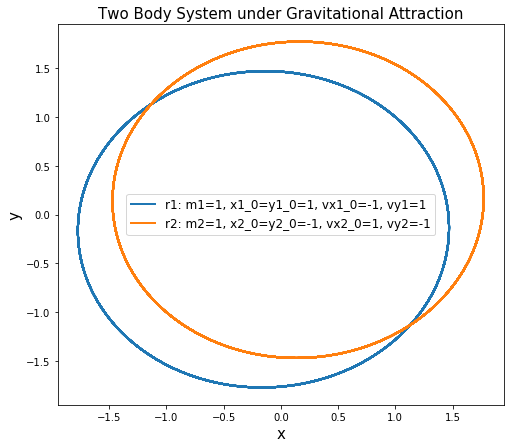

In [335]:
plt.figure(figsize=(8,7))
fontsize=15
plt.plot(x1, y1, linewidth=2.0, label='r1: m1=1, x1_0=y1_0=1, vx1_0=-1, vy1=1')
plt.plot(x2, y2, linewidth=2.0, label='r2: m2=1, x2_0=y2_0=-1, vx2_0=1, vy2=-1')
plt.xlabel(r'x', fontsize=fontsize)
plt.ylabel(r'y', fontsize=fontsize)
plt.legend(fontsize=12)
plt.title(r'Two Body System under Gravitational Attraction', fontsize=fontsize)

<h4>Comments:</h4>

As we see above, the initial position of m1 and m2 are opposite to each other (center of mass at origin). Since m1 and m2 have equal mass, they rotate aroud the center of mass with equal speed. 


<h3>Part (b): When m2 >> m1 </h3>

I set m1=0.00001 (still m2=1 and G = 10) to show that the problem reduces to the orbits considered in class.

In [336]:
# for easier demonstration, I use one for all parameters
m1= 0.00001
m2= 1.
G=10.
AU=1.
daysec=1. 

In [337]:
# Set up initial conditions
x1_0 = 1.
y1_0 = 1.

vx1_0 = -1
vy1_0 = 1.

x2_0 = -(m1/m2)*x1_0
y2_0 = -(m1/m2)*y1_0

vx2_0 = -(m1/m2)*vx1_0
vy2_0 = -(m1/m2)*vy1_0

In [338]:
# set up time
t0 = 0.0
t_final = daysec*2
dt = 0.01*daysec
t_pts = np.arange(t0, t_final, dt)
ob2 = TwoBody_Grav(m1=m1, m2=m2, G=G, AU=AU, daysec=daysec)

In [339]:
f0 = np.array([x1_0, y1_0, vx1_0, vy1_0, x2_0, y2_0, vx2_0, vy2_0])
solution2 = ob2.solve_ode(t_pts, f0)
x1 = solution2[0]
y1 = solution2[1]
vx1 = solution2[2]
vy1 = solution2[3]
x2 = solution2[4]
y2 = solution2[5]
vx2 = solution2[6]
vy2 = solution2[7]

Text(0.5, 1.0, 'Two Body System under Gravitational Attraction')

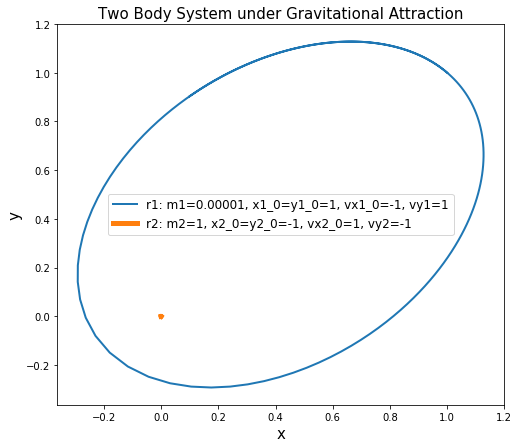

In [340]:
plt.figure(figsize=(8,7))
fontsize=15
plt.plot(x1, y1, linewidth=2.0, label='r1: m1=0.00001, x1_0=y1_0=1, vx1_0=-1, vy1=1')
plt.plot(x2, y2, linewidth=5.0, label='r2: m2=1, x2_0=y2_0=-1, vx2_0=1, vy2=-1')
plt.xlabel(r'x', fontsize=fontsize)
plt.ylabel(r'y', fontsize=fontsize)
plt.legend(fontsize=12)
plt.title(r'Two Body System under Gravitational Attraction', fontsize=fontsize)

<h4>Comments:</h4>

As we see above, the orbit of the system becomes the smaller object (m1=0.00001) rotating around the nearly-static bigger object (m2=1 >> m1), which is the model of Earth-Sun system. When m2 >> m1, the orbit of m1 now become a ellipse that is described in the class (m2 at the center of mass, and m1 centers around it in the orbit of ellipse). 


<h3>Part (c) Markdown Documentation</h3>

Please see the explanation above for the documentation. 

<h3>Part(d) LeapFrog Method</h3>

I am going to use the Leapfrog method (new class TwoBody_Grav_Leapfrog) to solve the differential equations and show that it conserves energy while using the SciPy ODE solvers do not.

In [341]:
class TwoBody_Grav_Leapfrog():
    """
    The motions of a binary system with gravitational attraction between two bodies in 2 dimension Cartesian 
    coordinate. Several algorithms for integration of ordinary differential equations are now available. 
    
    
    Parameters
    ----------
    m1: float
        mass of the first object
    m2: float
        mass of the second object
    G: float
        gravitational constant
    AU: float
        astronomical unit
    daysec:
        seconds of a day
        
    Method
    ------
    df_dt: return the right side of the differential equations
        
    """
    
    def __init__(self, m1=2.0e30, m2=4.0e30, G=6.67e-11, AU=1.5e11, daysec=24.*60*60):
        self.m1 = m1
        self.m2 = m2
        self.G = G
        self.AU = AU
        self.daysec = daysec
        self.gravconst = G*m1*m2
    
    def df_dt(self, t_pts, f):
        '''
        input function f and return the right side of the differential equation
        
        return
        ------
        [vx1, vy1, ax1, ay1, vx2, vy2, ax2, ay2]
        '''
        x1 = f[0]
        y1 = f[1]
        vx1 = f[2]
        vy1 = f[3]
        x2 = f[4]
        y2 = f[5]
        vx2 = f[6]
        vy2 = f[7]
        
        r1 = np.array([x1, y1])
        r2 = np.array([x2, y2])
        v1 = np.array([vx1, vy1])
        v2 = np.array([vx2, vy2])
    
        dr = np.sqrt((x1-x2)**2+(y1-y2)**2)
        
        dr1_dt = v1
        dr2_dt = v2
        
        dv1_dt = self.G*self.m2*(r2-r1)/dr**3
        dv2_dt = self.G*self.m1*(r1-r2)/dr**3
        
        return [dr1_dt[0], dr1_dt[1], dv1_dt[0], dv1_dt[1], 
                dr2_dt[0], dr2_dt[1], dv2_dt[0], dv2_dt[1]]

    def solve_ode_Leapfrog(self, t_pts, f0, abserr=1.0e-9, relerr=1.0e-9):
        """
        numerically solve the differential equation with the Leapfrog method.
        
        """
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the arrays for x1, y1, x_dot_1, y_dot_1, x2, y2, x_dot_2, y_dot_2 with zeros
        num_t_pts = len(t_pts)
        
        x1 = np.zeros(num_t_pts)
        x_dot_1 = np.zeros(num_t_pts)
        x_dot_1_half = np.zeros(num_t_pts)
        
       
        x2 = np.zeros(num_t_pts)
        x_dot_2 = np.zeros(num_t_pts)
        x_dot_2_half = np.zeros(num_t_pts)
        
        
        y1 = np.zeros(num_t_pts)
        y_dot_1 = np.zeros(num_t_pts)
        y_dot_1_half = np.zeros(num_t_pts)
        
        
        y2 = np.zeros(num_t_pts)
        y_dot_2 = np.zeros(num_t_pts)
        y_dot_2_half = np.zeros(num_t_pts)
        
        
        # initial value
        x1[0] = f0[0]
        x_dot_1[0] = f0[2]
        x2[0] = f0[4]
        x_dot_2[0] = f0[6]
        
        y1[0] = f0[1]
        y_dot_1[0] = f0[3]
        y2[0] = f0[5]
        y_dot_2[0] = f0[7]
        
        # Solving the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            
            f = [x1[i], y1[i], x_dot_1[i], y_dot_1[i], x2[i], y2[i], x_dot_2[i], y_dot_2[i]]
        
            x_dot_1_half[i] = x_dot_1[i] + self.df_dt(t, f)[2] * delta_t/2.
            x1[i+1] = x1[i] + x_dot_1_half[i] * delta_t
            x_dot_2_half[i] = x_dot_2[i] + self.df_dt(t, f)[6] * delta_t/2.
            x2[i+1] = x2[i] + x_dot_2_half[i] * delta_t
            
            
            
            y_dot_1_half[i] = y_dot_1[i] + self.df_dt(t, f)[3] * delta_t/2.
            y1[i+1] = y1[i] + y_dot_1_half[i] * delta_t
            y_dot_2_half[i] = y_dot_2[i] + self.df_dt(t, f)[7] * delta_t/2.
            y2[i+1] = y2[i] + y_dot_2_half[i] * delta_t
            
            y = [x1[i+1], x_dot_1[i], y1[i+1], y_dot_1[i],\
                 x2[i+1], x_dot_2[i], y2[i+1], y_dot_2[i]]
            
            x_dot_1[i+1] = x_dot_1_half[i] + self.df_dt(t, f)[2] * delta_t/2.
            y_dot_1[i+1] = y_dot_1_half[i] + self.df_dt(t, f)[3] * delta_t/2.
            x_dot_2[i+1] = x_dot_2_half[i] + self.df_dt(t, f)[6] * delta_t/2.
            y_dot_2[i+1] = y_dot_2_half[i] + self.df_dt(t, f)[7] * delta_t/2.
            
        return [x1, y1, x_dot_1, y_dot_1, x2, y2, x_dot_2, y_dot_2]
    
    def energy(self, t_pts, f):
        """
        Evaluate the total energy (U+T) as a function of time
        """
        return 1/2.*self.m1*(f[2]**2 + f[3]**2)+1/2.*self.m2*(f[6]**2 + f[7]**2)\
               +self.G*self.m1*self.m2/np.sqrt((f[0]-f[4])**2+(f[1]-f[5])**2)

<h4>Test the TwoBody_Grav_Leapfrog class with the same initial conditions</h4>

I use the same initial conditions above to see if we can get the same simulation from Leapfrog

In [342]:
# for easier demonstration, I use one for all parameters
m1= 1.
m2= 1.
G=10.
AU=1.
daysec=1.

In [343]:
# Set up initial conditions
x1_0 = 1.
y1_0 = 1.

vx1_0 = -1.
vy1_0 = 1.

x2_0 = -(m1/m2)*x1_0
y2_0 = -(m1/m2)*y1_0

vx2_0 = -(m1/m2)*vx1_0
vy2_0 = -(m1/m2)*vy1_0

In [344]:
# set up time
t0 = 0.0
t_final = daysec*200
dt = 0.01*daysec
t_pts2 = np.arange(t0, t_final, dt)

In [345]:
ob1_LF = TwoBody_Grav_Leapfrog(m1=m1, m2=m2, G=G, AU=AU, daysec=daysec)
f0 = np.array([x1_0, y1_0, vx1_0, vy1_0, x2_0, y2_0, vx2_0, vy2_0])
solution_LF = ob1_LF.solve_ode_Leapfrog(t_pts2, f0)
E_LF = ob1_LF.energy(t_pts2, solution_LF)

In [346]:
x1_LF = solution_LF[0]
y1_LF = solution_LF[1]
vx1_LF = solution_LF[2]
vy1_LF = solution_LF[3]
x2_LF = solution_LF[4]
y2_LF = solution_LF[5]
vx2_LF = solution_LF[6]
vy2_LF = solution_LF[7]

Text(0.5, 1.0, 'Two Body System under Gravitational Attraction (Leapfrog)')

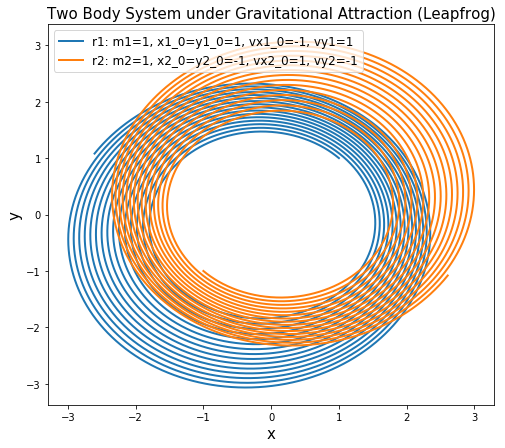

In [347]:
plt.figure(figsize=(8,7))
fontsize=15
plt.plot(x1_LF, y1_LF, linewidth=2.0, label='r1: m1=1, x1_0=y1_0=1, vx1_0=-1, vy1=1')
plt.plot(x2_LF, y2_LF, linewidth=2.0, label='r2: m2=1, x2_0=y2_0=-1, vx2_0=1, vy2=-1')
plt.xlabel(r'x', fontsize=fontsize)
plt.ylabel(r'y', fontsize=fontsize)
plt.legend(fontsize=12)
plt.title(r'Two Body System under Gravitational Attraction (Leapfrog)', fontsize=fontsize)

<h4>Comments: </h4>
    
As we can see above, we get the same result with Leapfrog. We can show the energy by calling the energy calculation function. 

In [354]:
E_rel = Energy-Energy[0]
E_rel_LF = E_LF - E_LF[0]

Text(0.5, 1.0, 'Energy Conservation')

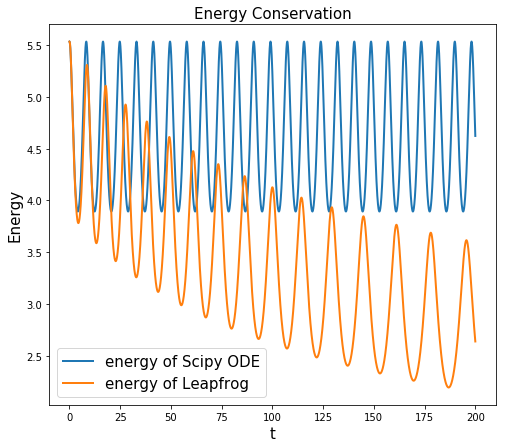

In [356]:
plt.figure(figsize=(8,7))
fontsize=15
plt.plot(t_pts1, Energy, linewidth=2.0, label='energy of Scipy ODE')
plt.plot(t_pts2, E_LF, linewidth=2.0, label='energy of Leapfrog')
plt.xlabel(r't', fontsize=fontsize)
plt.ylabel(r'Energy', fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.title(r'Energy Conservation', fontsize=fontsize)